# Robot Find Light

Creating a dataset for finding the light.

In [1]:
from jyro.simulator import (Robot, Pioneer, Pioneer16Sonars, PioneerFrontLightSensors, 
                            Camera, Simulator, VSimulator)
import numpy as np
from math import pi
from random import random

In [2]:
def make_world(physics):
    physics.addBox(0, 0, 4, 4, fill="backgroundgreen", wallcolor="gray")
    physics.addBox(1.75, 2.9, 2.25, 3.0, fill="blue", wallcolor="blue")
    physics.addLight(2, 3.5, 1.0)

In [3]:
def make_robot():
    robot = Pioneer("Pioneer", 2, 1, 0) #paremeters are x, y, heading (in radians)
    robot.addDevice(Camera())
    robot.addDevice(Pioneer16Sonars())
    light_sensors = PioneerFrontLightSensors(3) #parameter defines max range
    #light_sensors.lightMode = 'ambient'
    robot.addDevice(light_sensors)
    return robot

In [4]:
def get_senses(robot):
    light = robot["light"].getData()
    #print("light", light)
    sonar = robot["sonar"].getData()
    #print("sonar", sonar)
    return [light, sonar]

In [5]:
def random_start(robot):
    robot.setPose(0.5 + random()*2.5, 0.5 + random()*2, random()*2*pi)

In [6]:
def determine_move(senses):
    """Returns tuple of (translation, rotation) movement"""
    lights = senses[0]
    left_light = lights[0]
    right_light = lights[1]
    light_diff = abs(left_light-right_light)
    sonars = senses[1]
    # if found light, then stop
    if sum(lights) > 1.8:
        return (0, 0)
    # if getting close to an obstacle in front, turn to avoid it
    elif min(sonars[2:6]) < 0.5:
        # if closer on left, turn right
        if min(sonars[1:4]) < min(sonars[4:7]):
            return (0, -0.3)
        # otherwise, turn left
        else:
            return (0, 0.3)
    # if diff in light readings is high enough or total of light readings is
    # low ennough, then turn towards the light
    elif light_diff > 0.1 or sum(lights) < 0.1:
        # if brighter on left side, turn slightly left
        if  left_light > right_light:
            return (0.1, 0.3)
        else:
            return (0.1, -0.3)
    # default is to go straight
    else:
        return (0.3, 0)
    
def find_light_brain(robot):
    senses = get_senses(robot)
    translate, rotate = determine_move(senses)
    robot.move(translate, rotate)

In [7]:
robot = make_robot()
vsim = VSimulator(robot, make_world) #create a visual simulator to watch robot's behavior
random_start(robot)
vsim.update_gui()
robot.brain = find_light_brain

VBox(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='Update GUI'), Checkbox(value=False, description='Trace Path'), Text(value='0.0 seconds', description='Time:'))), HBox(children=(VBox(children=(HBox(children=(FloatSlider(value=0.0, layout=Layout(height='248px', padding='0px 0px 0px 0px', width='10px'), orientation='vertical', readout=False), HTML(value='<svg baseProfile="full" height="240" version="1.1" width="240" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><rect fill="#eef3dd" height="240.0" stroke="#bebebe" stroke-width="1" width="240.0" x="0.0" y="0.0" /><rect fill="#0000ff" height="6.0" stroke="#0000ff" stroke-width="1" width="30.0" x="105.0" y="60.0" /><circle cx="120.0" cy="30.0" fill="#ffff00" r="15.0" stroke="#ffff00" stroke-width="1" /><line fill="#800080" stroke="#a020f0" stroke-width="1" x1="120.0" x2="0.0" y1="180.0" y2="110.717964" /><line fill="#800080" stroke="#a020f0" stroke-width="1" x1="120.0" x2="240.0" y1="180.0" y2="110.717964" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="109.5" x2="0.0" y1="174.0" y2="174.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="111.0" x2="0.0" y1="169.8" y2="118.039848" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="113.4" x2="0.0" y1="168.0" y2="32.855142" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="117.0" x2="72.38645873701557" y1="166.5" y2="0.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="122.99999999999999" x2="167.61354126298448" y1="166.5" y2="0.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="126.6" x2="240.0" y1="168.0" y2="32.855142" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="129.0" x2="240.0" y1="169.8" y2="118.039848" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="130.5" x2="240.0" y1="174.0" y2="174.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="130.5" x2="240.0" y1="186.0" y2="186.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="129.0" x2="235.79644084796368" y1="190.2" y2="240.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="126.6" x2="166.87678224760555" y1="192.0" y2="240.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="122.99999999999999" x2="135.45963724447796" y1="193.5" y2="240.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="117.0" x2="104.54036275552205" y1="193.5" y2="240.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="113.39999999999999" x2="73.12321775239447" y1="192.0" y2="240.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="111.0" x2="4.203559152036306" y1="190.2" y2="240.0" /><line fill="#800080" stroke="#add8e6" stroke-width="1" x1="109.5" x2="0.0" y1="186.0" y2="186.0" /><line fill="#800080" stroke="#a020f0" stroke-width="1" x1="120.0" x2="117.69230705325427" y1="30.0" y2="60.0" /><line fill="#800080" stroke="#a020f0" stroke-width="1" x1="120.0" x2="122.30769294674575" y1="30.0" y2="60.0" /><polygon fill="red" points="115.19999999999999,166.5 109.5,171.0 109.5,189.0 115.19999999999999,193.5 124.80000000000001,193.5 130.5,189.0 130.5,171.0 124.80000000000001,166.5" stroke="red" stroke-width="1" /><polygon points="-3.0,-3.0 0,0 3.0,-3.0 0,3.0" stroke="black" stroke-width="1" transform="translate(120.0,180.0) rotate(180.0)" /><polygon fill="black" points="123.60000000000001,171.6 123.60000000000001,176.4 116.39999999999999,176.4 116.39999999999999,171.6" stroke="black" stroke-width="1" /><circle cx="109.5" cy="166.5" fill="yellow" r="1.5" stroke="orange" stroke-width="1" /><circle cx="130.5" cy="166.5" fill="yellow" r="1.5" stroke="orange" stroke-width="1" /></svg>'))), FloatSlider(value=0.0, layout=Layout(height='30px', padding='0px 0px 0px 10px', width='260px'), readout=False))), VBox(children=(HTML(value='<img style="image-rendering: pixelated;" src="data:image/gif;base64,R0lGODdhPAAoAIcAAK3Y5u7z3f//AJKSkp

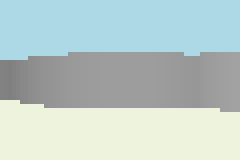

In [8]:
robot["camera"].getImage().resize((240, 160))

In [9]:
robot["camera"].lights

[(2.661347914428072, 1.9886887713326211)]

In [10]:
robot["camera"].scan

[(151, 9, 3.1468658102018714, 0.6853134189798128),
 (151, 9, 3.205917041685684, 0.6794082958314316),
 (151, 9, 3.271427583532677, 0.6728572416467322),
 (151, 9, 3.117340854250534, 0.6882659145749466),
 (151, 9, 2.955939301808889, 0.7044060698191111),
 (151, 10, 2.813799179070223, 0.7186200820929777),
 (151, 10, 2.6879332300963967, 0.7312066769903603),
 (151, 11, 2.575952233737128, 0.7424047766262871),
 (151, 11, 2.475923400873351, 0.752407659912665),
 (151, 11, 2.3862669170965702, 0.761373308290343),
 (151, 11, 2.3056804602620136, 0.7694319539737986),
 (151, 12, 2.233080789922769, 0.7766919210077231),
 (151, 12, 2.1675613146576613, 0.7832438685342339),
 (151, 12, 2.1083576826492845, 0.7891642317350716),
 (151, 12, 2.054822509355691, 0.7945177490644308),
 (151, 12, 2.006404088175722, 0.7993595911824277),
 (151, 12, 1.9626309549651584, 0.8037369045034841),
 (151, 13, 1.9230983499660799, 0.807690165003392),
 (151, 13, 1.8874580699053687, 0.8112541930094631),
 (151, 13, 1.855410109638303, 

In [11]:
get_senses(robot)

[[0.1461228864206821, 0.12172244605589383],
 [2.6372377111130882,
  2.854330863239106,
  2.0527609659953323,
  1.5421885828814874,
  1.4881493361730065,
  1.8251022517793707,
  1.1900404307087387,
  1.0197245152096421,
  1.0079192040998226,
  1.1047337454336814,
  1.5508853769772477,
  2.205636881674792,
  2.130937951766538,
  1.2567712693888453,
  3.0386776706954968,
  2.6490431220491546]]

In [12]:
def generate_data(robot, make_world, trials, filename):
    sim = Simulator(robot, make_world)
    fp = open(filename, "w")
    for i in range(trials):
        #print("Trial %d" % i)
        random_start(robot)
        while True:
            senses = get_senses(robot)
            translate, rotate = determine_move(senses)
            if translate == 0 and rotate == 0:
                break # found light, so end trial
            robot.move(translate, rotate)
            sim.step()
            lights = senses[0]
            sonars = [min(v/3.0, 1.0) for v in senses[1]] #normalize sonar values
            for value in lights:
                fp.write("%.3f " % value)
            for value in sonars[1:7]:
                fp.write("%.3f " % value)
            fp.write("%.1f %.1f\n" % (translate, rotate))
    fp.close()

In [13]:
generate_data(robot, make_world, 5, "testing_data.txt")